In [1]:
import pandas as pd

In [2]:
ri = pd.read_csv('RI_cleaned.csv', nrows=50000)

/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ri.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [4]:
ri.isnull().sum()

id                           0
state                        0
stop_date                    0
stop_time                    0
location_raw                 0
county_name              50000
county_fips              50000
fine_grained_location    50000
police_department            0
driver_gender             1990
driver_age_raw            1971
driver_age                2208
driver_race_raw           1988
driver_race               1988
violation_raw             1988
violation                 1988
search_conducted             0
search_type_raw          47988
search_type              47988
contraband_found             0
stop_outcome              1988
is_arrested               1988
stop_duration             1988
out_of_state              2203
drugs_related_stop           0
district                     0
dtype: int64

In [5]:
ri.isnull(). sum()/ri.isnull().shape[0]*100

id                         0.000
state                      0.000
stop_date                  0.000
stop_time                  0.000
location_raw               0.000
county_name              100.000
county_fips              100.000
fine_grained_location    100.000
police_department          0.000
driver_gender              3.980
driver_age_raw             3.942
driver_age                 4.416
driver_race_raw            3.976
driver_race                3.976
violation_raw              3.976
violation                  3.976
search_conducted           0.000
search_type_raw           95.976
search_type               95.976
contraband_found           0.000
stop_outcome               3.976
is_arrested                3.976
stop_duration              3.976
out_of_state               4.406
drugs_related_stop         0.000
district                   0.000
dtype: float64

In [6]:
ri.shape

(50000, 26)

In [7]:
drop_column = ['state', 'county_name', 'county_fips', 'fine_grained_location']
ri.drop(drop_column, axis='columns', inplace=True)

In [8]:
ri.shape

(50000, 22)

In [9]:
ri.isnull().sum()

id                        0
stop_date                 0
stop_time                 0
location_raw              0
police_department         0
driver_gender          1990
driver_age_raw         1971
driver_age             2208
driver_race_raw        1988
driver_race            1988
violation_raw          1988
violation              1988
search_conducted          0
search_type_raw       47988
search_type           47988
contraband_found          0
stop_outcome           1988
is_arrested            1988
stop_duration          1988
out_of_state           2203
drugs_related_stop        0
district                  0
dtype: int64

In [10]:
ri.dropna(subset=['driver_gender'], inplace=True)

In [11]:
ri.shape

(48010, 22)

In [12]:
ri.isnull().sum()

id                        0
stop_date                 0
stop_time                 0
location_raw              0
police_department         0
driver_gender             0
driver_age_raw            0
driver_age              232
driver_race_raw           0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type_raw       45998
search_type           45998
contraband_found          0
stop_outcome              0
is_arrested               0
stop_duration             0
out_of_state            215
drugs_related_stop        0
district                  0
dtype: int64

In [13]:
 ri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48010 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  48010 non-null  object 
 1   stop_date           48010 non-null  object 
 2   stop_time           48010 non-null  object 
 3   location_raw        48010 non-null  object 
 4   police_department   48010 non-null  object 
 5   driver_gender       48010 non-null  object 
 6   driver_age_raw      48010 non-null  float64
 7   driver_age          47778 non-null  float64
 8   driver_race_raw     48010 non-null  object 
 9   driver_race         48010 non-null  object 
 10  violation_raw       48010 non-null  object 
 11  violation           48010 non-null  object 
 12  search_conducted    48010 non-null  bool   
 13  search_type_raw     2012 non-null   object 
 14  search_type         2012 non-null   object 
 15  contraband_found    48010 non-null  bool   
 16  stop

In [14]:
ri.is_arrested.head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

In [15]:
ri.is_arrested.value_counts(dropna=False)

False    45522
True      2488
Name: is_arrested, dtype: int64

In [16]:
print(ri.is_arrested.dtype)

object


In [17]:
ri.is_arrested = ri.is_arrested.astype('bool')

In [18]:
combined = ri.stop_date.str.cat(ri.stop_time, sep = " ")

In [19]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [20]:
ri.drop(['stop_date','stop_time'], axis=1, inplace=True)

In [21]:
print(ri.dtypes)

id                            object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [22]:
ri.set_index('stop_datetime', inplace=True)

In [23]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [24]:
ri.violation.value_counts(dropna=True)

Speeding               36111
Moving violation        6522
Equipment               3022
Registration/plates     1463
Other                    892
Name: violation, dtype: int64

In [25]:
ri.violation.value_counts(dropna=True, normalize=True)

Speeding               0.752156
Moving violation       0.135847
Equipment              0.062945
Registration/plates    0.030473
Other                  0.018579
Name: violation, dtype: float64

In [26]:
ri.driver_gender.value_counts()

M    34701
F    13309
Name: driver_gender, dtype: int64

In [27]:
female = ri[ri.driver_gender == 'F']
male = ri[ri.driver_gender == 'M']

In [28]:
female.violation.value_counts(normalize=True)

Speeding               0.811180
Moving violation       0.099031
Equipment              0.045608
Registration/plates    0.027575
Other                  0.016605
Name: violation, dtype: float64

In [29]:
male.violation.value_counts(normalize=True)

Speeding               0.729518
Moving violation       0.149967
Equipment              0.069595
Registration/plates    0.031584
Other                  0.019337
Name: violation, dtype: float64

In [30]:
ri.groupby(['driver_gender'])['violation'].value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.811180
               Moving violation       0.099031
               Equipment              0.045608
               Registration/plates    0.027575
               Other                  0.016605
M              Speeding               0.729518
               Moving violation       0.149967
               Equipment              0.069595
               Registration/plates    0.031584
               Other                  0.019337
Name: violation, dtype: float64

In [31]:
female_and_speeding= female[female['violation']=='Speeding']
male_and_speeding= male[male['violation']=='Speeding']

In [32]:
ri.stop_outcome.value_counts()

Citation            43787
Arrest Driver        2268
Warning               871
N/D                   663
Arrest Passenger      220
No Action             201
Name: stop_outcome, dtype: int64

In [33]:
print(female_and_speeding.stop_outcome.value_counts(normalize=True))
print("==============")
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.973416
Warning             0.012968
Arrest Driver       0.007410
N/D                 0.003612
Arrest Passenger    0.002316
No Action           0.000278
Name: stop_outcome, dtype: float64
Citation            0.957298
Arrest Driver       0.026230
Warning             0.010666
N/D                 0.003397
Arrest Passenger    0.002015
No Action           0.000395
Name: stop_outcome, dtype: float64


In [34]:
ri.groupby(['violation', 'driver_gender'])['stop_outcome'].value_counts(normalize=True)

violation            driver_gender  stop_outcome    
Equipment            F              Citation            0.650741
                                    N/D                 0.205931
                                    Arrest Driver       0.065898
                                    Warning             0.046129
                                    Arrest Passenger    0.026359
                                    No Action           0.004942
                     M              Citation            0.682402
                                    N/D                 0.133333
                                    Arrest Driver       0.117184
                                    Warning             0.050104
                                    Arrest Passenger    0.014493
                                    No Action           0.002484
Moving violation     F              Citation            0.868741
                                    Arrest Driver       0.072838
                                    W

In [35]:
print(ri.search_conducted.dtype)

bool


In [36]:
ri.search_conducted.value_counts(normalize=True)

False    0.958092
True     0.041908
Name: search_conducted, dtype: float64

In [37]:
ri.search_conducted.mean()

0.04190793584669861

In [38]:
female.search_conducted.mean()

0.017807498685100308

In [39]:
male.search_conducted.mean()

0.05115126365234431

In [40]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.017807
M    0.051151
Name: search_conducted, dtype: float64

In [41]:
ri.groupby(['driver_gender','violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.079077
               Moving violation       0.047800
               Other                  0.045249
               Registration/plates    0.114441
               Speeding               0.006854
M              Equipment              0.123395
               Moving violation       0.088778
               Other                  0.154993
               Registration/plates    0.171533
               Speeding               0.028560
Name: search_conducted, dtype: float64

In [42]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.079077
                     M                0.123395
Moving violation     F                0.047800
                     M                0.088778
Other                F                0.045249
                     M                0.154993
Registration/plates  F                0.114441
                     M                0.171533
Speeding             F                0.006854
                     M                0.028560
Name: search_conducted, dtype: float64

In [43]:
ri.search_type.value_counts()

Incident to Arrest                                          958
Probable Cause                                              244
Protective Frisk                                            204
Inventory                                                   117
Incident to Arrest,Inventory                                116
Incident to Arrest,Probable Cause                            76
Incident to Arrest,Protective Frisk                          63
Reasonable Suspicion                                         43
Probable Cause,Protective Frisk                              36
Incident to Arrest,Inventory,Protective Frisk                33
Inventory,Protective Frisk                                   23
Incident to Arrest,Probable Cause,Protective Frisk           20
Incident to Arrest,Inventory,Probable Cause                  19
Inventory,Probable Cause                                     16
Protective Frisk,Reasonable Suspicion                        16
Probable Cause,Reasonable Suspicion     

In [44]:
ri['frist']=ri.search_type.str.contains('Protective Frisk', na = False)

In [45]:
print(ri.frist.dtype)

bool


In [46]:
ri.frist.sum()

403

In [47]:
search = ri[ri.search_conducted]

In [48]:
search.frist.mean()

0.20029821073558648

In [49]:
search.groupby('driver_gender').frist.mean()

driver_gender
F    0.164557
M    0.205070
Name: frist, dtype: float64

In [50]:
ri.groupby('driver_gender').frist.mean()

driver_gender
F    0.00293
M    0.01049
Name: frist, dtype: float64

In [51]:
search = ri[ri.search_conducted==False]

In [52]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frist
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False


In [53]:
ri.is_arrested.mean()

0.05182253697146428

In [54]:
ri.reset_index(inplace=True)

In [55]:
ri.head()

,stop_datetime,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frist
0,2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False
1,2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False
2,2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
3,2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
4,2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False


In [56]:
ri['date_time']= ri.stop_datetime

In [58]:
ri.set_index('stop_datetime', inplace=True)

In [64]:
ri.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 22, 23, 23],
           dtype='int64', name='stop_datetime', length=48010)

In [69]:
ri.groupby(ri.index.hour).mean()['is_arrested']

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64

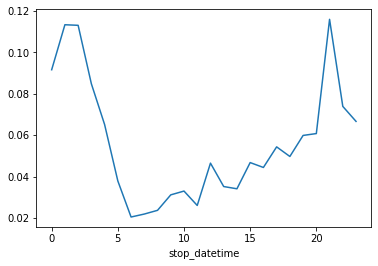

In [70]:
ri.groupby(ri.index.hour).mean()['is_arrested'].plot()

In [71]:
hourly_arrest_rate=ri.groupby(ri.index.hour).mean()['is_arrested']

In [72]:
ri.date_time.head()

stop_datetime
2005-01-02 01:55:00   2005-01-02 01:55:00
2005-01-02 20:30:00   2005-01-02 20:30:00
2005-01-04 12:55:00   2005-01-04 12:55:00
2005-01-06 01:30:00   2005-01-06 01:30:00
2005-01-12 08:05:00   2005-01-12 08:05:00
Name: date_time, dtype: datetime64[ns]

In [73]:
ri.date_time.dt.month

stop_datetime
2005-01-02 01:55:00    1
2005-01-02 20:30:00    1
2005-01-04 12:55:00    1
2005-01-06 01:30:00    1
2005-01-12 08:05:00    1
                      ..
2006-08-08 22:45:00    8
2006-08-08 22:45:00    8
2006-08-08 22:53:00    8
2006-08-08 23:00:00    8
2006-08-08 23:00:00    8
Name: date_time, Length: 48010, dtype: int64

Text(0.5, 1.0, 'Hourly Arrest Rate')

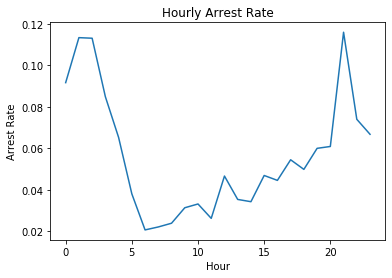

In [75]:
import matplotlib.pyplot as plt
hourly_arrest_rate.plot()
plt.ylabel('Arrest Rate')
plt.xlabel('Hour')
plt.title('Hourly Arrest Rate')

In [77]:
ri.drugs_related_stop.value_counts(dropna=False)

False    47685
True       325
Name: drugs_related_stop, dtype: int64

In [79]:
ri.groupby(ri.index.year).drugs_related_stop.mean()

stop_datetime
2005    0.008038
2006    0.006257
Name: drugs_related_stop, dtype: float64

In [80]:
ri.drugs_related_stop.resample('A').mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006257
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [81]:
ri.drugs_related_stop.resample('Q').mean()

stop_datetime
2005-03-31    0.038462
2005-06-30    0.000000
2005-09-30    0.000000
2005-12-31    0.008054
2006-03-31    0.006718
2006-06-30    0.004827
2006-09-30    0.008455
Freq: Q-DEC, Name: drugs_related_stop, dtype: float64

In [82]:
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

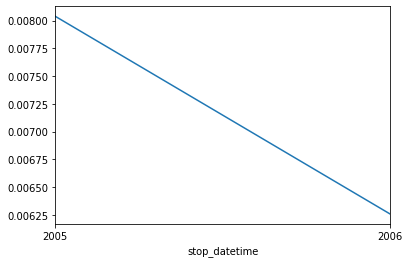

In [83]:
annual_drug_rate.plot()

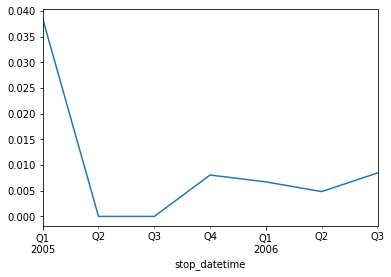

In [84]:
ri.drugs_related_stop.resample('Q').mean().plot()

In [88]:
ri.groupby(ri.index.year).search_conducted.mean()

stop_datetime
2005    0.050692
2006    0.038361
Name: search_conducted, dtype: float64

In [86]:
annual_search_rate=ri.search_conducted.resample('A').mean()

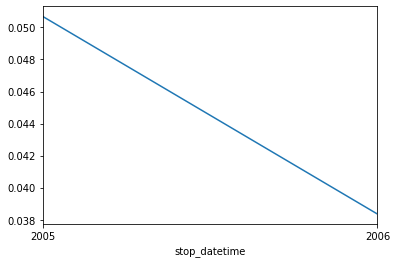

In [87]:
annual_search_rate.plot()

In [89]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

In [90]:
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006257,0.038361


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f868b0a1b10>,
      dtype=object)

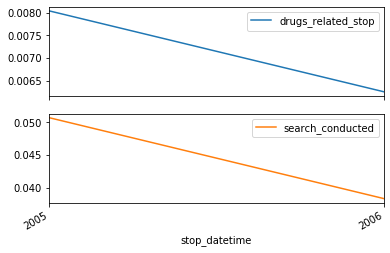

In [92]:
annual.plot(subplots=True)

In [93]:
ri.district.unique()

array(['Zone K1', 'Zone X4', 'Zone X1', 'Zone K3', 'Zone X3', 'Zone K2'],
      dtype=object)

In [94]:
ri.district.value_counts()

Zone K3    13554
Zone X4    10563
Zone K2     9707
Zone K1     6809
Zone X3     5460
Zone X1     1917
Name: district, dtype: int64

In [95]:
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608
Zone X1,93,643,44,9,1128
Zone X3,342,741,127,102,4148
Zone X4,806,2220,249,609,6679


In [96]:
all_zones = pd.crosstab(ri.district, ri.violation)

In [97]:
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608


In [98]:
k_zones = all_zones.loc['Zone K1':'Zone K3']

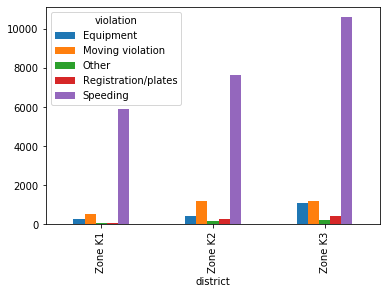

In [100]:
k_zones.plot.bar();

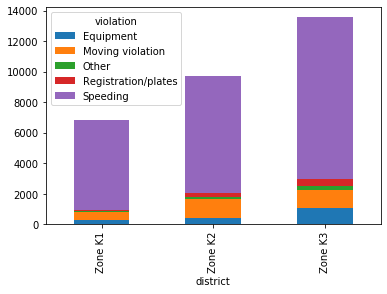

In [101]:
k_zones.plot(kind='bar', stacked=True)

In [107]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     40662
16-30 Min     5672
30+ Min       1676
Name: stop_duration, dtype: int64

In [103]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [104]:
ri['stop_min'] = ri.stop_duration.map(mapping)

In [106]:
ri.stop_min.value_counts(dropna=False)

8     40662
23     5672
45     1676
Name: stop_min, dtype: int64

In [108]:
ri.violation_raw.unique()

array(['Speeding', 'Equipment/Inspection Violation', 'Call for Service',
       'Other Traffic Violation', 'Registration Violation',
       'Violation of City/Town Ordinance',
       'Special Detail/Directed Patrol', 'APB',
       'Motorist Assist/Courtesy', 'Suspicious Person', 'Warrant'],
      dtype=object)

In [111]:
ri.groupby('violation_raw').stop_min.mean()

violation_raw
APB                                 28.078431
Call for Service                    27.637895
Equipment/Inspection Violation      13.668101
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Registration Violation              17.304170
Special Detail/Directed Patrol      30.902778
Speeding                             9.707181
Suspicious Person                   21.821429
Violation of City/Town Ordinance    11.153846
Warrant                             29.666667
Name: stop_min, dtype: float64

In [112]:
stop_lengt = ri.groupby('violation_raw').stop_min.mean()

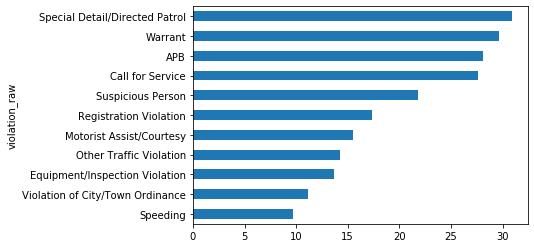

In [115]:
stop_lengt.sort_values().plot.barh()

In [116]:
weahter = pd.read_csv('weather.csv')

In [117]:
weahter.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
weahter[['TAVG', 'TMAX', 'TMIN']].describe()

,TAVG,TMAX,TMIN
count,1217.000000,8005.000000,7996.000000
mean,52.493016,61.247096,42.099425
std,17.829792,18.495043,17.386667
min,6.000000,13.000000,-10.000000
25%,39.000000,46.000000,29.000000
50%,54.000000,62.000000,42.000000
75%,68.000000,77.000000,57.000000
max,86.000000,102.000000,77.000000


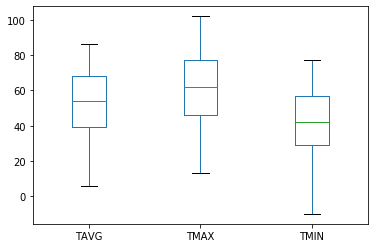

In [119]:
weahter[['TAVG', 'TMAX', 'TMIN']].plot(kind='box')

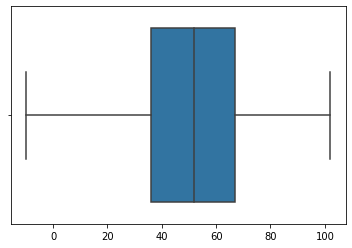

In [120]:
sns.boxplot(x=['TAVG', 'TMAX', 'TMIN'], data=weahter)

In [123]:
weahter['TDIFF'] = weahter.TMAX - weahter.TMIN

In [124]:
weahter.TDIFF.describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

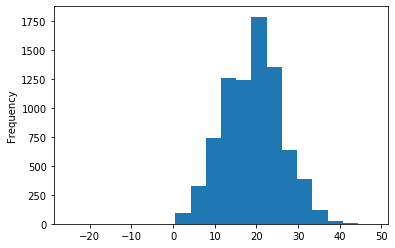

In [125]:
weahter.TDIFF.plot(kind='hist',bins=20)

In [130]:
WT = weahter.loc[:,'WT01':'WT22']

In [131]:
weahter['bad_conditions'] = WT.sum(axis='columns')

In [132]:
weahter.bad_conditions.value_counts(dropna=False)

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [136]:
weahter['bad_conditions']= weahter.bad_conditions.fillna(0).astype('int')

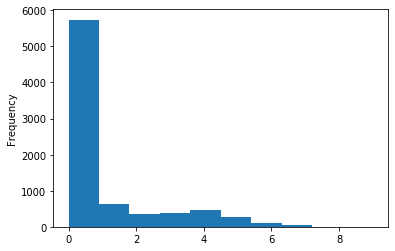

In [137]:
weahter.bad_conditions.plot(kind='hist')

In [138]:
weahter.bad_conditions.value_counts(dropna=False)

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

In [182]:
weather_date_rating= weahter.groupby('DATE').sum()[['bad_conditions']]

In [139]:
mapping = {0:"good", 1:"bad", 2:"bad", 3:"bad", 4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9:"worse"}

In [183]:
weather_date_rating.reset_index()

,DATE,bad_conditions
0,2005-01-01,2
1,2005-01-02,2
2,2005-01-03,3
3,2005-01-04,4
4,2005-01-05,4
...,...,...
4012,2015-12-27,1
4013,2015-12-28,0
4014,2015-12-29,3
4015,2015-12-30,2


In [185]:
weather_date_rating['rating'] = weather_date_rating.bad_conditions.map(mapping)

In [186]:
weather_date_rating.rating.value_counts()

bad      1834
good     1747
worse     436
Name: rating, dtype: int64

In [187]:
cats=['good', 'bad', 'worse']

In [188]:
weather_date_rating['rating'] = pd.Categorical(weather_date_rating.rating, ordered=True, categories=cats)

In [146]:
weahter.rating.max()

'worse'

In [147]:
weahter.rating.min()

'good'

In [189]:
weather_date_rating.rating.sort_values()

DATE
2013-11-29     good
2008-12-18     good
2008-12-14     good
2008-12-13     good
2013-07-30     good
              ...  
2009-10-28    worse
2009-10-31    worse
2009-11-05    worse
2007-06-08    worse
2008-06-06    worse
Name: rating, Length: 4017, dtype: category
Categories (3, object): [good < bad < worse]

In [164]:
ri.reset_index(inplace=True)

In [165]:
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [153]:
weahter_rating= weahter[['DATE', 'rating']]

In [154]:
weahter_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [155]:
weahter_rating.shape

(8022, 2)

In [159]:
weahter_rating.DATE.nunique()

4017

In [166]:
ri.shape

(48010, 23)

In [190]:
ri_group_weather=pd.merge(left=ri, right=weather_date_rating, left_on='stop_date', right_on='DATE', how='left')

In [192]:
ri_group_weather.head()

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,bad_conditions,rating
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2,bad
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2,bad
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,4,bad
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,9,worse
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,...,NaN,False,Citation,False,30+ Min,True,False,Zone X1,8,worse


In [193]:
ri_group_weather.shape

(48010, 25)

In [194]:
ri.shape

(48010, 23)

In [196]:
ri_weather.is_arrested.mean()

0.05181638974936638

In [197]:
ri_weather.groupby("rating")["is_arrested"].mean()

rating
good     0.051263
bad      0.051462
worse    0.062559
Name: is_arrested, dtype: float64

In [198]:
ri_group_weather.groupby("rating")["is_arrested"].mean()

rating
good     0.049776
bad      0.051462
worse    0.062559
Name: is_arrested, dtype: float64

In [200]:
arrest_rate=ri_weather.groupby(["violation","rating"])["is_arrested"].mean()

In [203]:
arrest_rate.loc['Moving violation','bad']

0.11629857422421024

In [205]:
arrest_rate.loc['Speeding']

rating
good     0.023061
bad      0.021220
worse    0.026168
Name: is_arrested, dtype: float64

In [206]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [207]:
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested', aggfunc='mean')

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168
